## Heart Disease Dataset EDA
https://archive.ics.uci.edu/dataset/45/heart+disease

In [ ]:
# Delete the dataset from drive.
import os

file_to_delete = '/content/heart_desease.csv'

if os.path.exists(file_to_delete):
    os.remove(file_to_delete)
    print(f"{file_to_delete} has been deleted.")
else:
    print(f"{file_to_delete} doesn't exist.")

/content/heart_desease.csv doesn't exist.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_desease.csv to heart_desease.csv


In [ ]:
# Libraries for Exploratory Data Analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('heart_desease.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
print(df['target'].unique())

[1 0]


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

there are no nulls

## Check data type

In [ ]:
# to know the type of variable
df.nunique()

In [ ]:
df.dtypes

In [ ]:
# Change categorical type to categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for column in categorical_columns:
    df[column] = df[column].astype('object')

# Display data types after the conversion
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object


In [ ]:
unique_values_ca = df['ca'].unique()
print("Unique values in 'ca' column:", unique_values_ca)

Unique values in 'ca' column: [0 2 1 3 4]


In [ ]:
# Count the number of occurrences of each category in descending order
ca_value_counts = df['ca'].value_counts(ascending=False)
print("Count of each category in 'ca' column (descending order):")
print(ca_value_counts)

Count of each category in 'ca' column (descending order):
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


In [ ]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in the DataFrame:")
print(missing_values)

Missing values in the DataFrame:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Change labels for better interpretation/visualization understanding
df['target'] = df['target'].replace({1: "Disease", 0: "No Disease"})
df['sex'] = df['sex'].replace({1: "Male", 0: "Female"})
df['cp'] = df['cp'].replace({1: "Typical Angina",
                             2: "Atypical Angina",
                             3: "Non-Anginal Pain",
                             4: "Asymptomatic"})
df['exang'] = df['exang'].replace({1: "Yes", 0: "No"})
df['slope'] = df['slope'].replace({1: "Upsloping",
                                   2: "Flat",
                                   3: "Downsloping"})
df['thal'] = df['thal'].replace({1: "Fixed Defect", 2: "Reversible Defect", 3: "Normal"})


In [ ]:
# Display basic statistics of the DataFrame
basic_stats = df.describe()
print("Basic Statistics of the DataFrame:")
print(basic_stats)

Basic Statistics of the DataFrame:
              age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


## EDA on Heart Disease Dataset

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Count of each class in the 'target' column:
Disease       165
No Disease    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

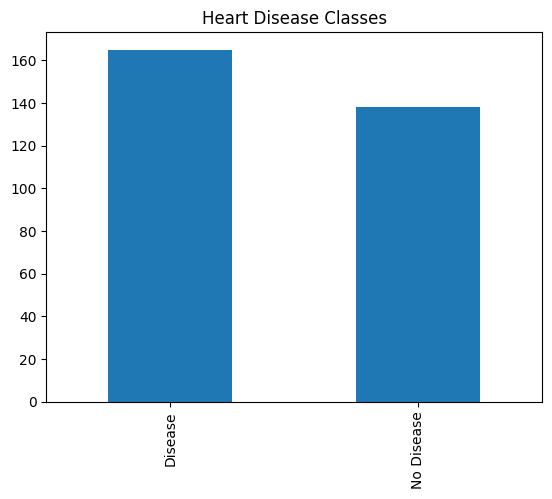

In [ ]:
# Display the count of each class in the 'target' column
target_value_counts = df['target'].value_counts()
print("Count of each class in the 'target' column:")
print(target_value_counts)

# Plot a bar chart for better visualization of class distribution
target_value_counts.plot(kind='bar').set_title('Heart Disease Classes')

Count of each age in the 'age' column:
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64


Text(0.5, 1.0, 'Age Distribution')

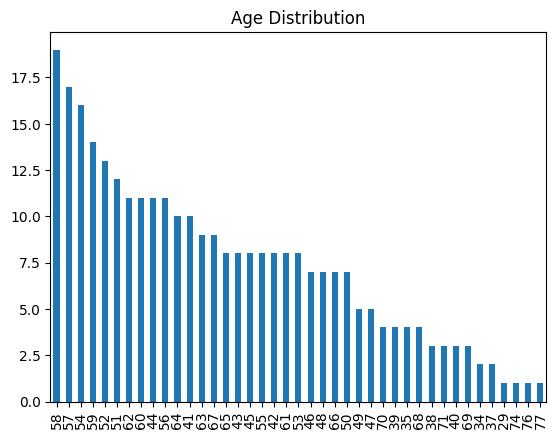

In [ ]:
# Display the count of each age in the 'age' column
age_value_counts = df['age'].value_counts()
print("Count of each age in the 'age' column:")
print(age_value_counts)

# Plot a bar chart for better visualization of age distribution
age_value_counts.plot(kind='bar').set_title('Age Distribution')

Top 10 age values and their counts:
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: age, dtype: int64


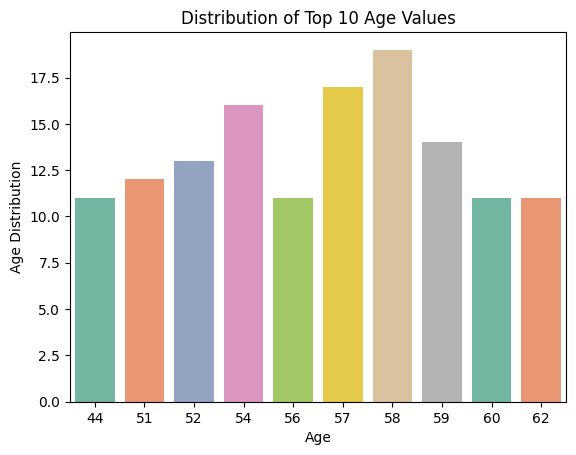

In [ ]:
# Display the count of the top 10 age values in the 'age' column
top_10_age_value_counts = df['age'].value_counts()[:10]
print("Top 10 age values and their counts:")
print(top_10_age_value_counts)

# Plot a bar chart for the distribution of the top 10 age values
sns.barplot(x=top_10_age_value_counts.index,
            y=top_10_age_value_counts.values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age Distribution')
plt.title('Distribution of Top 10 Age Values')
plt.show()

In [ ]:
# Display the youngest, oldest, and mean age in the 'age' column
youngest_age = min(df['age'])
oldest_age = max(df['age'])
mean_age = df['age'].mean()

print(f"Youngest Age: {youngest_age}")
print(f"Oldest Age: {oldest_age}")
print(f"Mean Age: {mean_age}")

Youngest Age: 29
Oldest Age: 77
Mean Age: 54.366336633663366


Count of each gender in the 'sex' column:
Male      207
Female     96
Name: sex, dtype: int64


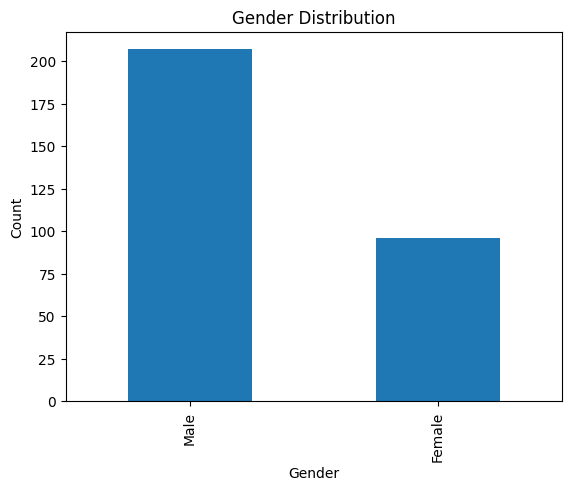

In [ ]:
# Display the count of each gender in the 'sex' column
sex_value_counts = df['sex'].value_counts()
print("Count of each gender in the 'sex' column:")
print(sex_value_counts)

# Plot a bar chart for the distribution of genders
sex_value_counts.plot(kind='bar').set_title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Count of each chest pain type in the 'cp' column:
0                   143
Atypical Angina      87
Typical Angina       50
Non-Anginal Pain     23
Name: cp, dtype: int64


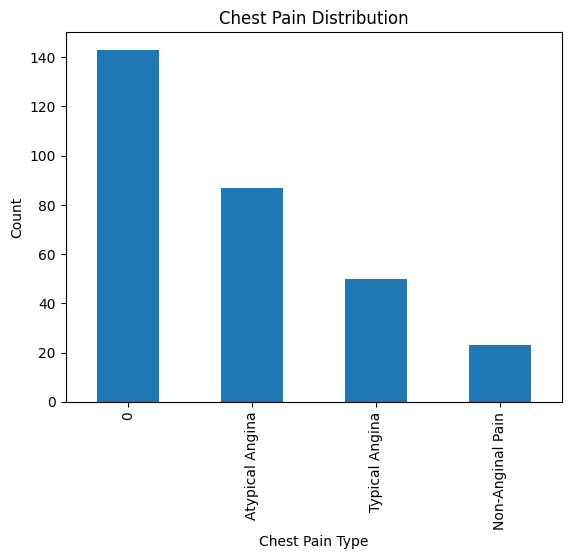

In [ ]:
# Display the count of each chest pain type in the 'cp' column
chest_pain_value_counts = df['cp'].value_counts()
print("Count of each chest pain type in the 'cp' column:")
print(chest_pain_value_counts)

# Plot a bar chart for the distribution of chest pain types
chest_pain_value_counts.plot(kind='bar').set_title('Chest Pain Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

Count of each resting ECG result in the 'restecg' column:
1    152
0    147
2      4
Name: restecg, dtype: int64


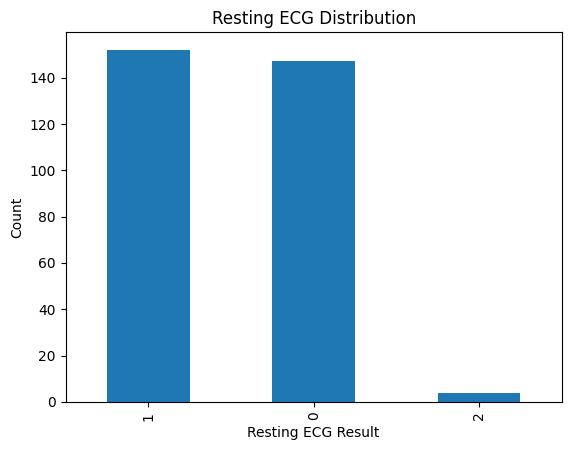

In [ ]:
# Display the count of each resting ECG result in the 'restecg' column
rest_ecg_value_counts = df['restecg'].value_counts()
print("Count of each resting ECG result in the 'restecg' column:")
print(rest_ecg_value_counts)

# Plot a bar chart for the distribution of resting ECG results
rest_ecg_value_counts.plot(kind='bar').set_title('Resting ECG Distribution')
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.show()

Count of exercise-induced angina in the 'exang' column:
No     204
Yes     99
Name: exang, dtype: int64


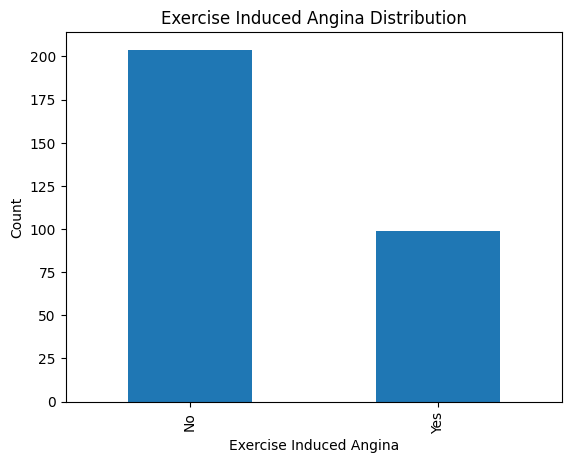

In [ ]:
# Display the count of exercise-induced angina in the 'exang' column
exercise_angina_value_counts = df['exang'].value_counts()
print("Count of exercise-induced angina in the 'exang' column:")
print(exercise_angina_value_counts)

# Plot a bar chart for the distribution of exercise-induced angina
exercise_angina_value_counts.plot(kind='bar').set_title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.show()

Count of each number of major vessels in the 'ca' column:
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


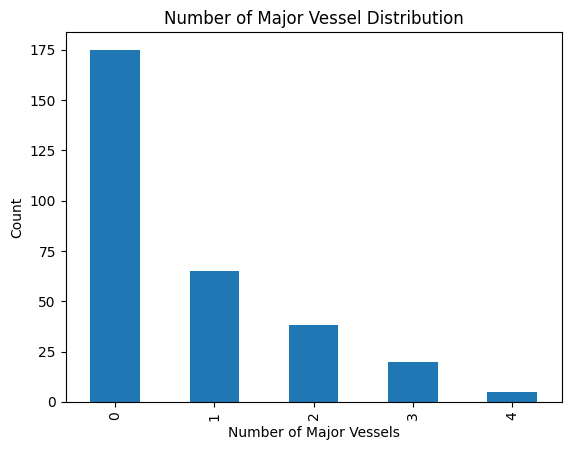

In [ ]:
# Display the count of each number of major vessels in the 'ca' column
major_vessel_value_counts = df['ca'].value_counts()
print("Count of each number of major vessels in the 'ca' column:")
print(major_vessel_value_counts)

# Plot a bar chart for the distribution of the number of major vessels
major_vessel_value_counts.plot(kind='bar').set_title('Number of Major Vessel Distribution')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.show()

Count of each thalassemia type in the 'thal' column:
Reversible Defect    166
Normal               117
Fixed Defect          18
0                      2
Name: thal, dtype: int64


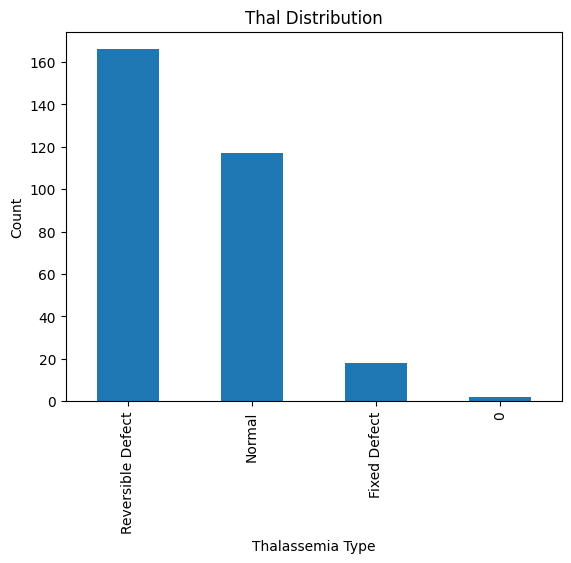

In [ ]:
# Display the count of each thalassemia type in the 'thal' column
thal_value_counts = df['thal'].value_counts()
print("Count of each thalassemia type in the 'thal' column:")
print(thal_value_counts)

# Plot a bar chart for the distribution of thalassemia types
thal_value_counts.plot(kind='bar').set_title('Thal Distribution')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.show()

# Visualize categorical data distribution

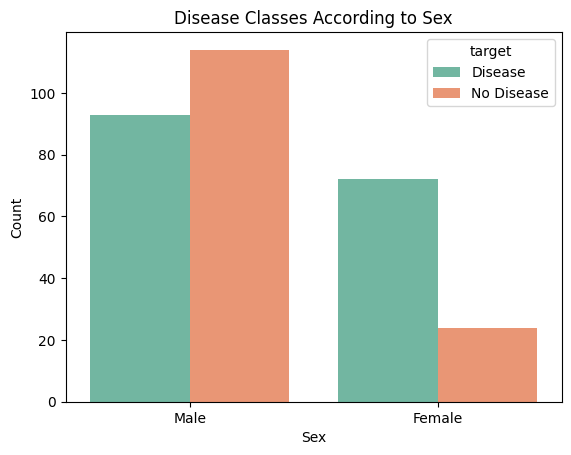

In [ ]:
# Create a count plot for disease classes according to sex
sns.countplot(x='sex', hue='target', data=df, palette='Set2').set_title('Disease Classes According to Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

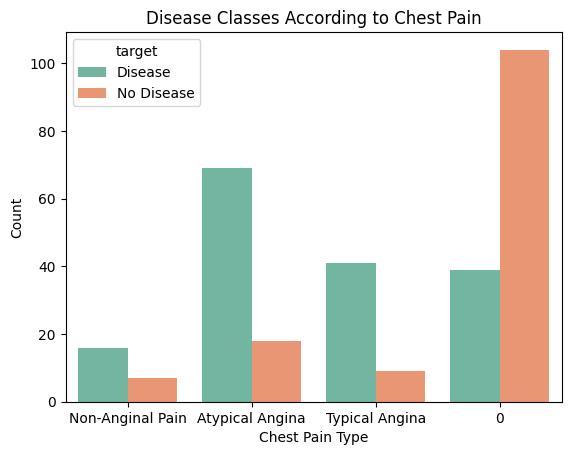

In [ ]:
# Create a count plot for disease classes according to chest pain
sns.countplot(x='cp', hue='target', data=df, palette='Set2').set_title('Disease Classes According to Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

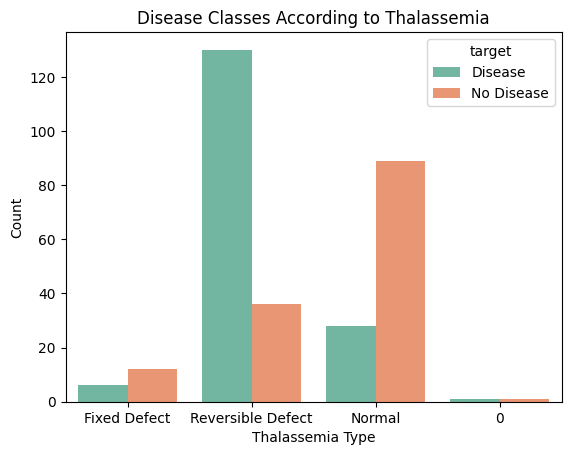

In [ ]:
# Create a count plot for disease classes according to thalassemia type
sns.countplot(x='thal', hue='target', data=df, palette='Set2').set_title('Disease Classes According to Thalassemia')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.show()

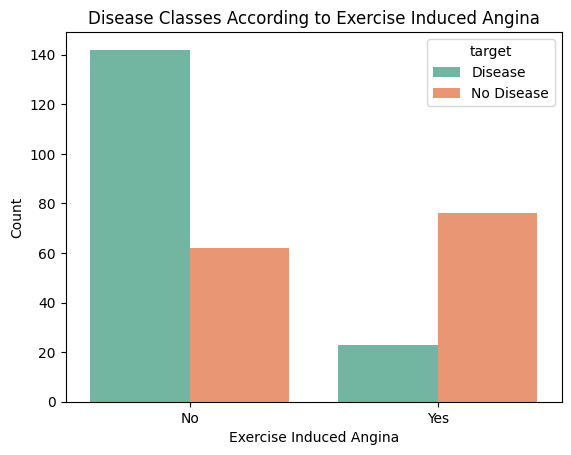

In [ ]:
# Create a count plot for disease classes according to exercise-induced angina
sns.countplot(x='exang', hue='target', data=df, palette='Set2').set_title('Disease Classes According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.show()

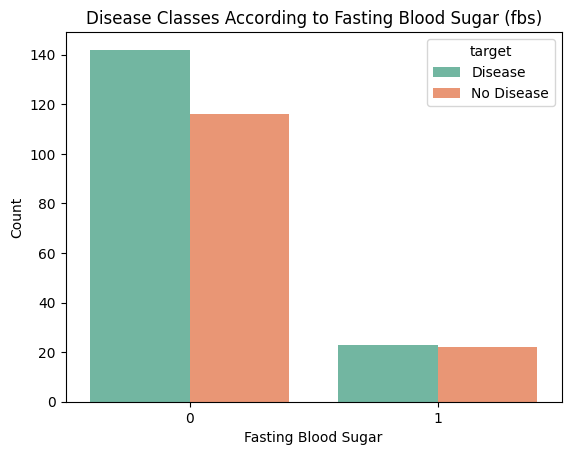

In [ ]:
# Create a count plot for disease classes according to fasting blood sugar (fbs)
sns.countplot(x='fbs', hue='target', data=df, palette='Set2').set_title('Disease Classes According to Fasting Blood Sugar (fbs)')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()

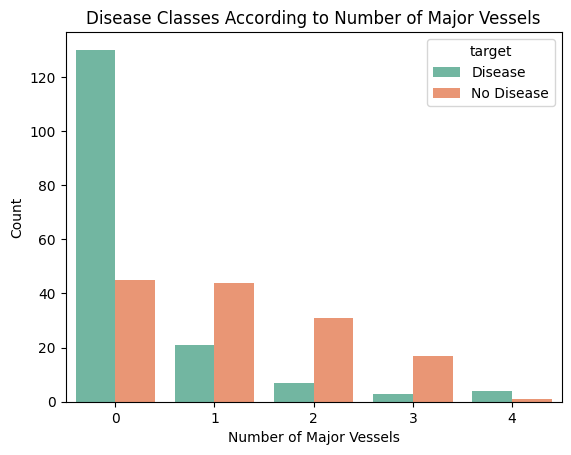

In [ ]:
# Create a count plot for disease classes according to the number of major vessels ('ca')
sns.countplot(x='ca', hue='target', data=df, palette='Set2').set_title('Disease Classes According to Number of Major Vessels')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.show()

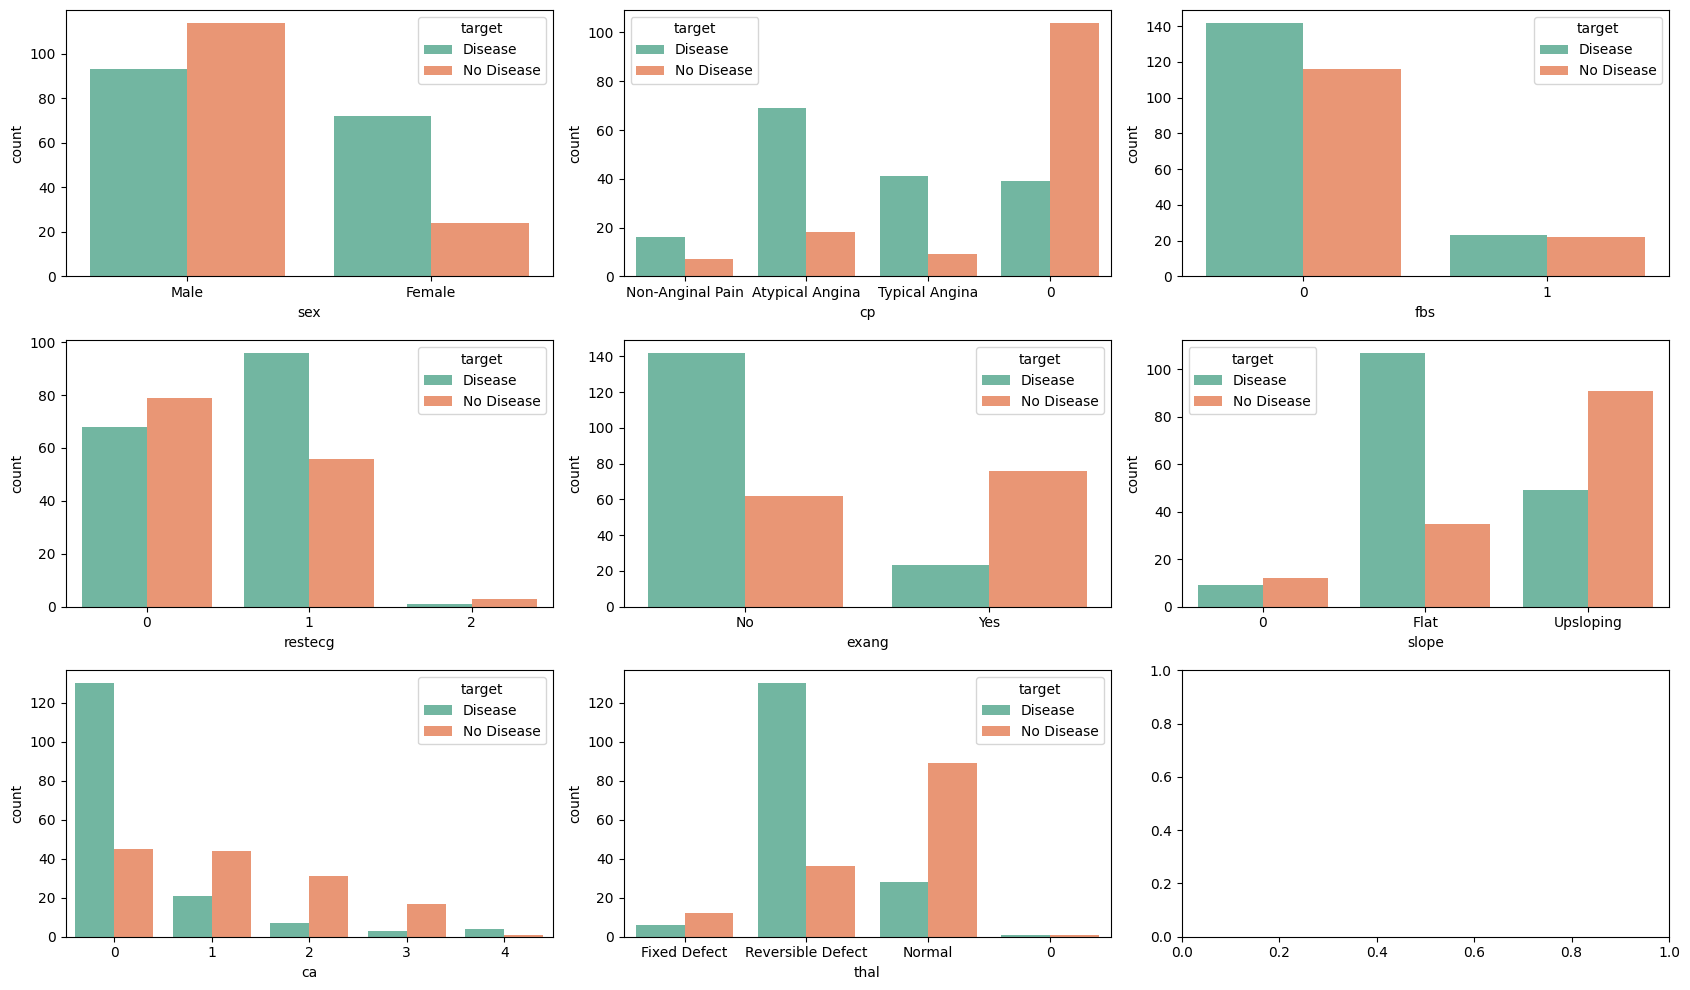

In [ ]:
# For plotting, group categorical features in cat_feat
# To create distribution for 8 features (sex to thal), the 9th is the target
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Loop through each categorical feature and create count plots
for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx % 3]

    # Check if the feature is not the target
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax, palette='Set2')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

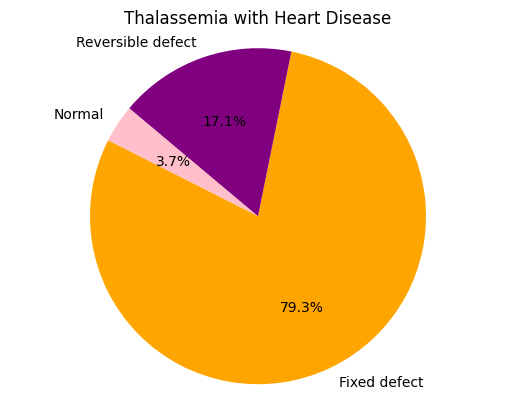

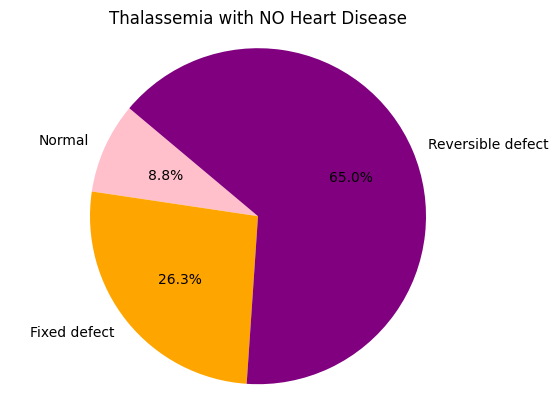

In [ ]:
# Visualize Thalassemia with heart disease
labels = 'Normal', 'Fixed defect', 'Reversible defect'
sizes = [6, 130, 28]
colors = ['pink', 'orange', 'purple']

plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Thalassemia with Heart Disease')
plt.show()

# Visualize Thalassemia with NO heart disease
labels = 'Normal', 'Fixed defect', 'Reversible defect'
sizes = [12, 36, 89]
colors = ['pink', 'orange', 'purple']

plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with NO Heart Disease')
plt.show()

## Visualize the distribution of continuous variable across target variable

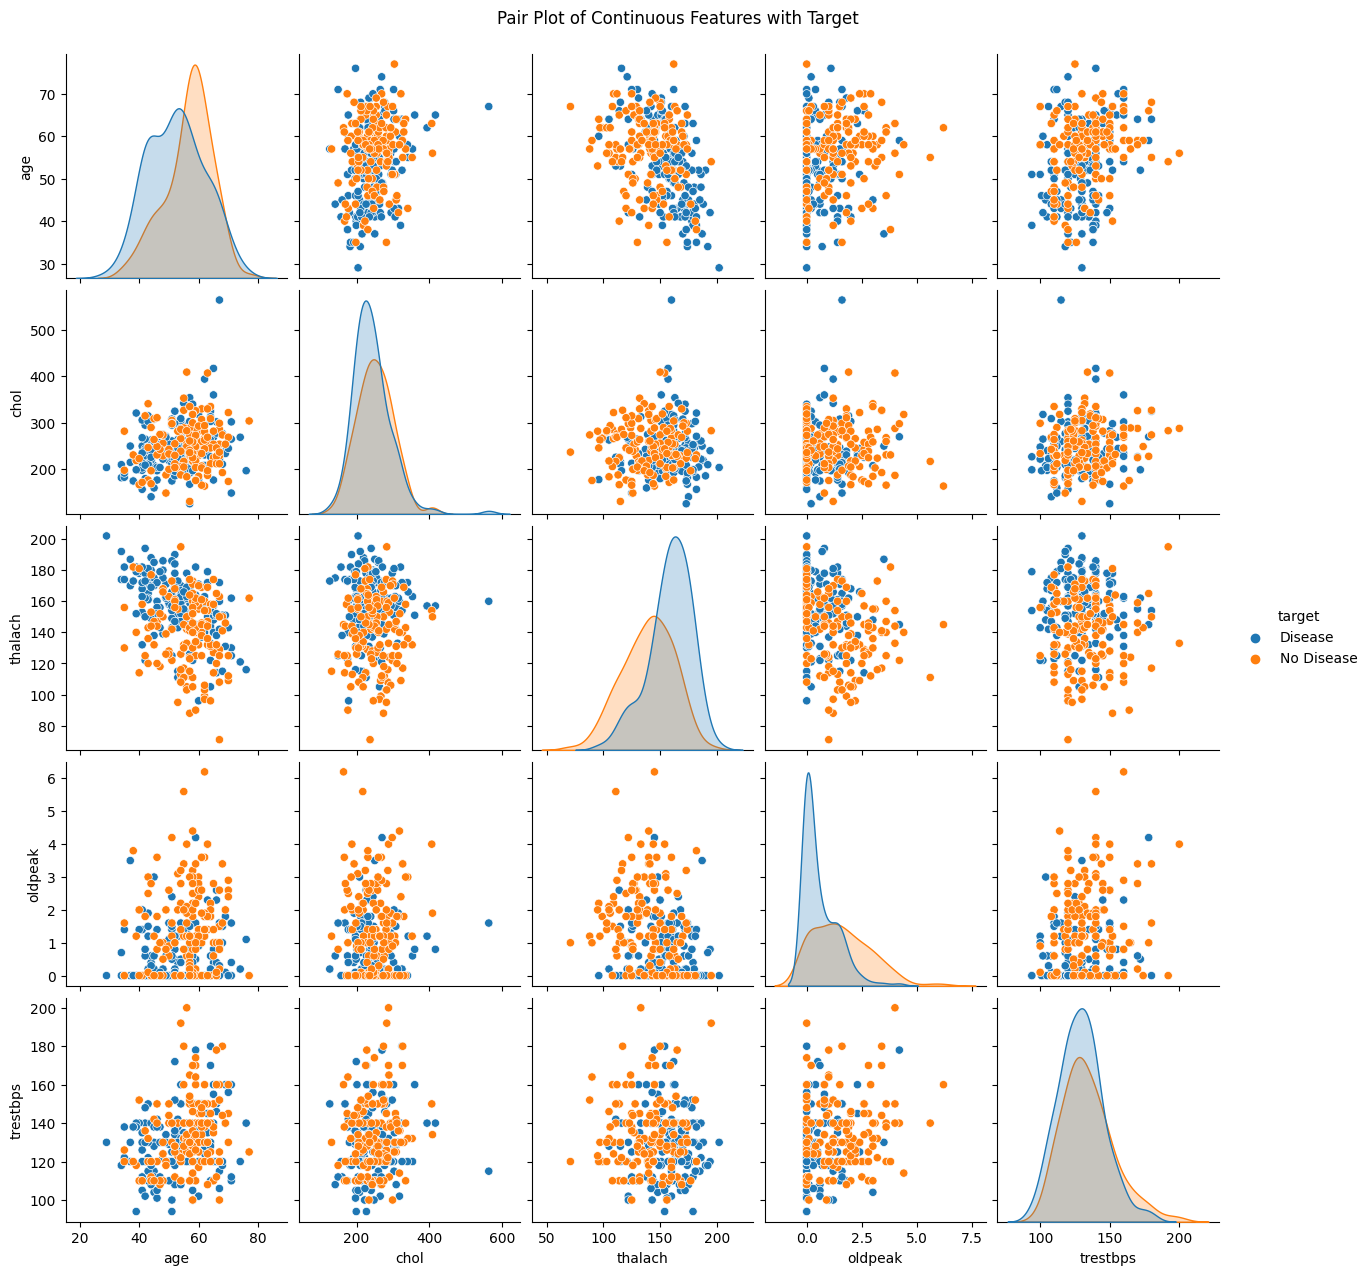

In [ ]:
# Define continuous variables
continuous_features = ['age', 'chol', 'thalach', 'oldpeak', 'trestbps']

# Create a pair plot for continuous features along with the target variable
sns.pairplot(df[continuous_features + ['target']], hue='target')
plt.suptitle('Pair Plot of Continuous Features with Target', y=1.02)
plt.show()

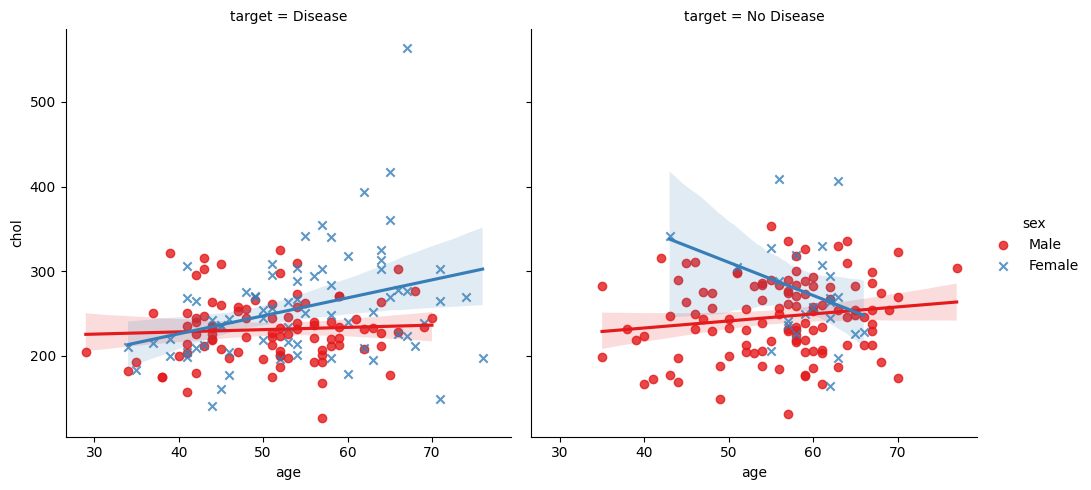

In [ ]:
# Understand the relationship between age and chol in each target based on sex
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           markers=["o", "x"],
           palette="Set1",
           data=df)
plt.show()

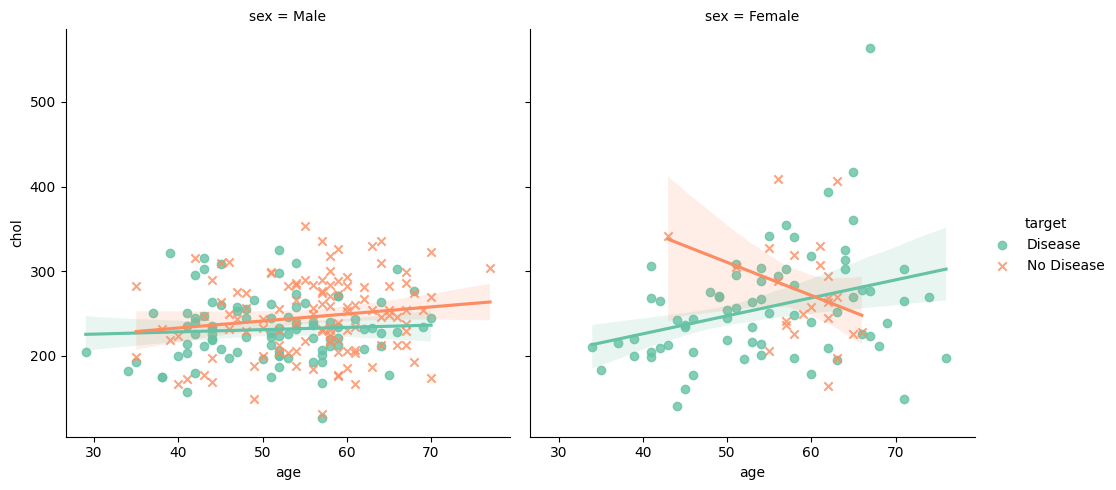

In [ ]:
# Understand the relationship between age and chol in each sex based on target
sns.lmplot(x="age",
           y="chol",
           hue="target",
           col="sex",
           markers=["o", "x"],
           palette="Set2",
           data=df)
plt.show()

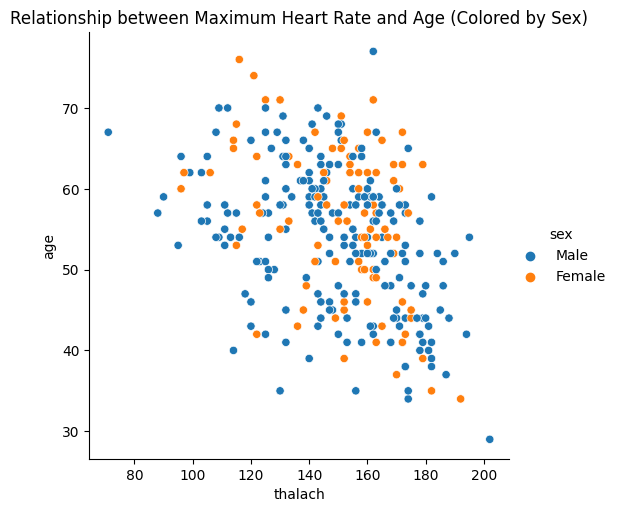

In [ ]:
# Create a scatter plot to understand the relationship between thalach and age, colored by sex
sns.relplot(x='thalach', y='age', hue='sex', data=df)
plt.title('Relationship between Maximum Heart Rate and Age (Colored by Sex)')
plt.show()

<ipython-input-42-ce6cb68c4ec3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-42-ce6cb68c4ec3>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-42-ce6cb68c4ec3>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this wa

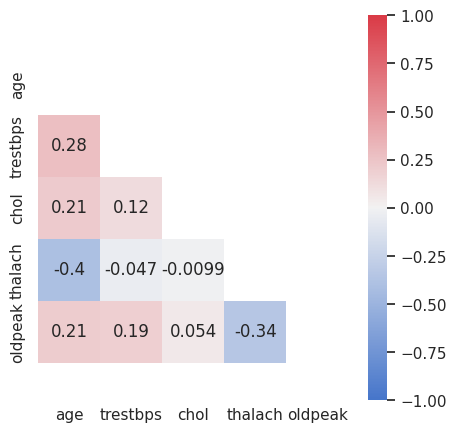

In [ ]:
# Set the style to white
sns.set(style="white")

# Create a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(5, 5))

# Choose a diverging color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)

# Generate the correlation heatmap with annotations
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap, vmin=-1, vmax=1, ax=ax)

# Fixing an issue where the top and bottom rows are partially cut off
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Display the heatmap
plt.show()

In [ ]:
df['target']

0         Disease
1         Disease
2         Disease
3         Disease
4         Disease
          ...    
298    No Disease
299    No Disease
300    No Disease
301    No Disease
302    No Disease
Name: target, Length: 303, dtype: object

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('heart_desease.csv')

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']



In [ ]:
# Identify categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Pass through the remaining columns
)

# Create a pipeline with the preprocessing and logistic regression steps
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
X

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix:
[[27  2]
 [ 4 28]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with the preprocessing and Random Forest Classifier steps
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the Random Forest model on the training set
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.87

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Random Forest Confusion Matrix:
[[25  4]
 [ 4 28]]


In [ ]:
from sklearn.svm import SVC

# Create a pipeline with the preprocessing and Support Vector Machine steps
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Train the SVM model on the training set
model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.70

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61


SVM Confusion Matrix:
[[15 14]
 [ 4 28]]


# Conclusion

In this analysis, we explored a dataset related to heart disease, employing various data visualization techniques to gain insights into the dataset's characteristics. Key highlights include:

1. **Categorical Variable Transformation:** We converted categorical variables to more meaningful labels for better interpretation and visualization.

2. **Distribution Analysis:** We examined the distribution of various features, such as age, chest pain types, and thalassemia, to understand their prevalence within the dataset.

3. **Disease Class Visualization:** Utilizing count plots, we visualized the distribution of disease classes concerning different categorical features, such as sex, chest pain, and thalassemia.

4. **Pair Plot for Continuous Features:** We generated a pair plot to visualize the relationships between continuous features and the target variable, gaining insights into potential patterns.

5. **Scatter Plots and Regression Analysis:** Scatter plots and regression plots were employed to explore relationships between variables, particularly examining age, cholesterol, and maximum heart rate based on gender and disease status.

6. **Correlation Heatmap:** We used a correlation heatmap to visualize the relationships between different numerical features, identifying potential correlations that could influence the target variable.

The comprehensive analysis provides a foundational understanding of the dataset, offering valuable insights for further exploration or predictive modeling. The visualization techniques applied enhance our ability to interpret complex relationships within the data.